参考资料:https://cloud.tencent.com/developer/article/1425552

# 数据预处理

## 特征缩放/无量纲化

### 标准化

标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。

$$x^{*}=\frac{x-\mu}{\sigma}$$

$\mu$ 为期望,均值
$\sigma$ 为方差

In [8]:
# 取消科学计数法
import numpy as np
np.set_printoptions(suppress=True)

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data = iris.data

from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(data)[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### 判断数据是否符合正态分布

参考:https://blog.csdn.net/laobai1015/article/details/107845838?utm_medium=distribute.pc_relevant.none-task-blog-baidulandingword-1&spm=1001.2101.3001.4242

画图

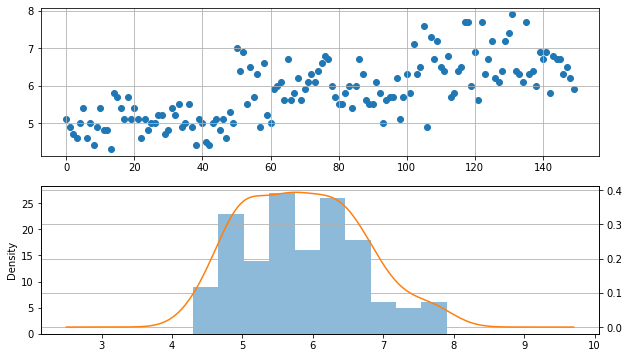

In [4]:
import matplotlib.pyplot as plt

s = data['sepal length (cm)']
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
 
ax2 = fig.add_subplot(2,1,2)  # 创建子图2
s.hist(bins=10,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

K-S检验

In [5]:
#导入scipy模块
import pandas as pd
from scipy import stats
 
"""
kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
结果返回两个值：statistic → D值，pvalue → P值
p值大于0.05，为正态分布
H0:样本符合  
H1:样本不符合 
如果p>0.05接受H0 ,反之 
"""

u = s.mean()  # 计算均值
std = s.std()  # 计算标准差
stats.kstest(s, 'norm', (u, std))

KstestResult(statistic=0.08865361377316261, pvalue=0.1781373784859167)

In [6]:
from scipy.stats import shapiro
 
shapiro(data['sepal length (cm)'])

ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)

偏度和峰度

参考:https://www.mediecogroup.com/method_topic_article_detail/169/

<img src="https://gitee.com/itangqian/picgo/raw/master/img/image-20200824145925488.png" alt="image-20200824145925488" style="zoom: 33%;" />

<img src="https://gitee.com/itangqian/picgo/raw/master/img/image-20200824150042528.png" alt="image-20200824150042528" style="zoom:33%;" />

In [7]:
stats.skew(data['sepal length (cm)']) # 偏度

0.3117530585022963

In [8]:
stats.kurtosis(data['sepal length (cm)']) # 峰度

-0.5735679489249765

### 区间缩放法

区间缩放法的思路有多种，常见的一种为利用两个最值进行缩放，公式表达为：

$$
x^{\prime}=\frac{x-M i n}{M a x-M i n}
$$

In [5]:
from sklearn.preprocessing import MinMaxScaler
# 取消科学计数法
import numpy as np
np.set_printoptions(suppress=True)

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data = iris.data

#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(data)[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### 归一化/正则化

归一化是按照数据的**行**进行处理的.该方法主要应用于文本分类和聚类中.计算两个样本之间的相似性.

正则化的过程是将每个样本缩放到单位范数.

0范数，向量中非零元素的个数。

1范数，为绝对值之和。

2范数，就是通常意义上的模。

无穷范数，就是取向量的最大值。

- 向量的范数
  - 1-范数：$\|X\|_{1}=\sum_{i=1}^{n}\left|x_{i}\right|$，各个元素的绝对值之和
  - 2-范数：$\|X\|_{2}=\left(\sum_{i=1}^{n} x_{i}^{2}\right)^{\frac{1}{2}}=\sqrt{\sum_{i=1}^{n} x_{i}^{2}}$，每个元素的平方和再开平方根
  - p-范数：$\|X\|_{p}=\left(\sum_{i=1}^{n}\left|x_{i}\right|^{p}\right)^{\frac{1}{p}}$
  - 无穷范数：$\|X\|_{\infty}=\max _{1 \leq i \leq n}\left|x_{i}\right|$，向量的所有元素的绝对值中**最大**的
  
规则为L2的归一化公式为:$${ x }^{ ' }=\frac { x }{ \sqrt { \sum _{ i=1 }^{ n } x_{ i }^{ 2 } }  } $$



In [6]:
from sklearn.preprocessing import Normalizer # 默认2范数
# 取消科学计数法
import numpy as np
np.set_printoptions(suppress=True)

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data = iris.data

Normalizer().fit_transform(data)[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

### 绝对值最大标准化

公式：${ X }_{ new }=\frac { X }{ { \vert{ X }\vert}_{ max } }$

缩放到[-1, 1]之间

In [7]:
from sklearn.preprocessing import MaxAbsScaler
# 取消科学计数法
import numpy as np
np.set_printoptions(suppress=True)

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data = iris.data

MaxAbsScaler().fit_transform(data)[:5]

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ]])

## 对定量特征二值化

设定一个阈值,大于阈值的赋值为1,小于等于阈值的赋值为0

$$
x^{\prime}=\left\{\begin{array}{l}1, x>\text { threshold } \\ 0, x \leq \text { threshold }\end{array}\right.
$$

In [13]:
from sklearn.preprocessing import Binarizer

Binarizer(threshold=3).fit_transform(data)

array([[1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],


## 对定性特征哑编码

哑编码:OneHotEncoder, 直观来说就是有多少个状态就有多少比特，而且只有一个比特为1，其他全为0的一种码制。

参考:https://blog.csdn.net/weixin_40807247/article/details/82812206

In [14]:
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()

OneHotEncoder().fit_transform(iris.target.reshape((-1, 1)))

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.preprocessing import OneHotEncoder
#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
OneHotEncoder().fit_transform(iris.target.reshape((-1,1))).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## 缺失值处理

In [28]:
from numpy import vstack, array, nan
from sklearn.impute import SimpleImputer
import pandas as pd

data = pd.DataFrame([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer().fit_transform(data)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

## 数据转换

### 多项式转换

In [31]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures().fit_transform(iris.data).shape

(150, 15)

### 对数转换

In [36]:
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p

FunctionTransformer(log1p, validate=False).fit_transform(iris.data)[:5]

array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156]])

# 特征选择

## 方差选择法

In [38]:
from sklearn.feature_selection import VarianceThreshold

VarianceThreshold(threshold=3).fit_transform(iris.data)[:5]

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4]])

## SelectKBest

### 相关系数法

In [40]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

SelectKBest(lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y), X.T))).T[0], k=2).fit_transform(iris.data, iris.target)[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### 卡方检验

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### 最大信息系数法

In [46]:
from sklearn.feature_selection import SelectKBest
from minepy import MINE

def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

SelectKBest(lambda X, Y: np.array(list(map(lambda x: mic(x, Y), X.T))).T[0], k=2).fit_transform(iris.data, iris.target)[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### RFE

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=2).fit_transform(iris.data, iris.target)[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])